#  J Bumrah VS M Shami - Bowling Stats

### Import Necessary Libraries

- pandas – For data manipulation and analysis.
- matplotlib & seaborn – For data visualization (bar charts, line plots, etc.).
- train_test_split – To split the dataset into training and testing sets.
- RandomForestClassifier – Machine learning model for bowler selection.
- LabelEncoder – Converts categorical features into numerical format.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

### Data Import

Bowling performance data was manually extracted from CricSTATS and saved in CSV format.

In [68]:
bumrah_df = pd.read_csv(r'C:\Users\suhan\OneDrive\Desktop\Cricket Analysis\j_bumrah.csv',encoding='unicode_escape')
shami_df = pd.read_csv(r'C:\Users\suhan\OneDrive\Desktop\Cricket Analysis\m_shami.csv',encoding='unicode_escape')

print("Jasprit Bumrah Stats:")
print(bumrah_df.head())

print("\nMohammed Shami Stats:")
print(shami_df.head())

Jasprit Bumrah Stats:
                                 Ground Match Format  Mat  Inns  Overs  Mdns  \
0             Adelaide Oval - Australia         T20I    1     1    3.3     0   
1  Melbourne Cricket Ground - Australia         T20I    2     2    8.0     0   
2             Perth Stadium - Australia         T20I    0     0    0.0     0   
3             Adelaide Oval - Australia          ODI    0     0    0.0     0   
4  Melbourne Cricket Ground - Australia          ODI    0     0    0.0     0   

   Runs  Wkts   BBI    Ave  Econ  SR  4  5  
0    23     3  3/23   7.66  6.57   7  0  0  
1    57     3  2/37  19.00  7.12  16  0  0  
2     0     0     0   0.00  0.00   0  0  0  
3     0     0     0   0.00  0.00   0  0  0  
4     0     0     0   0.00  0.00   0  0  0  

Mohammed Shami Stats:
                                 Ground Match Format  Mat  Inns  Overs  Mdns  \
0             Adelaide Oval - Australia         T20I    2     2    6.0     0   
1  Melbourne Cricket Ground - Australia     

### Machine Learning Model

Steps Followed:
1. Merge both players' stats into a single dataset.
2. Feature Encoding: Convert categorical variables (grounds, player names) into numerical format.
3. Feature Selection: Define input variables (wickets, economy rate, strike rate, etc.).
4. Train Split: Dataset is entirely used for training (80%) due to small size.
5. Model Training: Apply Random Forest Classifier to identify the best bowler.
6. Model Evaluation: Assess performance using accuracy score and feature importance analysis.

In [70]:
#Merge Data
bumrah_df["Player"] = "Bumrah"
shami_df["Player"] = "Shami"
df = pd.concat([bumrah_df, shami_df])

# Remove rows where the ground is either "Hobart" or "Perth"
ddf = df[~((df['Ground'] == 'Hobart') | (df['Ground'] == 'Perth Stadium\xa0- Australia'))]

df = df[df['Match Format'] == 'T20I']

#encode Catagorical Data
ground_encoder = LabelEncoder()
player_encoder = LabelEncoder()
df["Ground"] = ground_encoder.fit_transform(df["Ground"])
df["Player"] = player_encoder.fit_transform(df["Player"])

X = df[["Mat", "Wkts", "Econ", "Ave", "SR"]]
y = df["Player"]

print(y.value_counts())

Player
0    3
1    3
Name: count, dtype: int64


In [74]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

# Evaluate the model performance
accuracy = accuracy_score(y, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

# accuracy = model.score(X_test, y_test)
# print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Feature Importance Analysis

The Random Forest Model evaluates which factors contribute most to bowler selection.
Higher feature importance means the metric has a stronger influence on the selection decision.

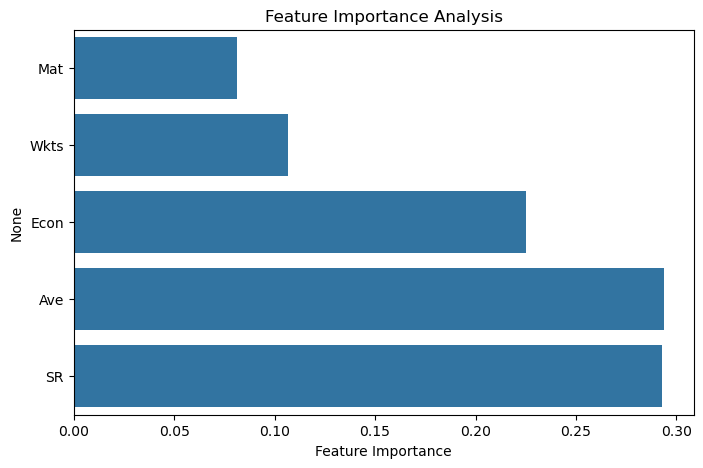

In [76]:
# Feature importance plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis")
plt.show()

#### Data Visualization - Strike Rate Comparison
Compare the strike rate of each player on different grounds

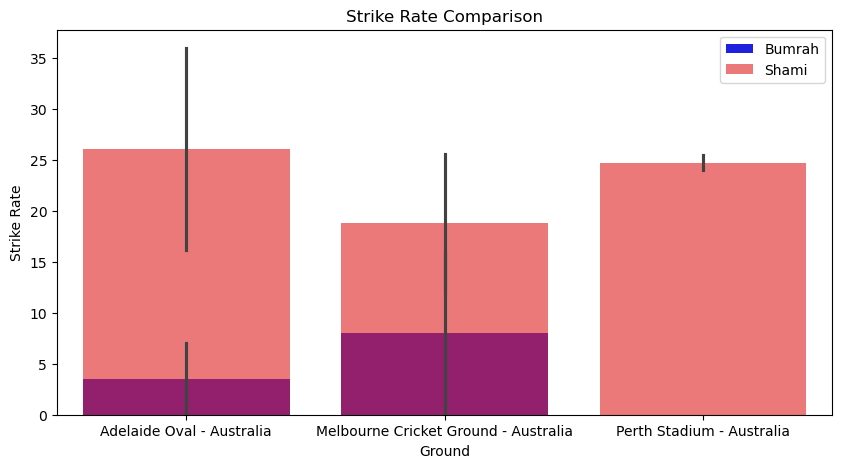

In [85]:
plt.figure(figsize=(10, 5))
sns.barplot(x=bumrah_df["Ground"], y=bumrah_df["SR"], color='blue', label="Bumrah")
sns.barplot(x=shami_df["Ground"], y=shami_df["SR"], color='red', label="Shami", alpha=0.6)
plt.xlabel("Ground")
plt.ylabel("Strike Rate")
plt.title("Strike Rate Comparison")
plt.legend()
plt.show()

**Interpretation:** Lower SR is better. A lower SR suggests the bowler is more effective at taking wickets quickly.
From the above visual it is evident that J Bumrah has lower Strike Rate compared to M Shami.

#### Data Visualization: Bowling Average Comparison

Compares the Bowling Average of both bowlers

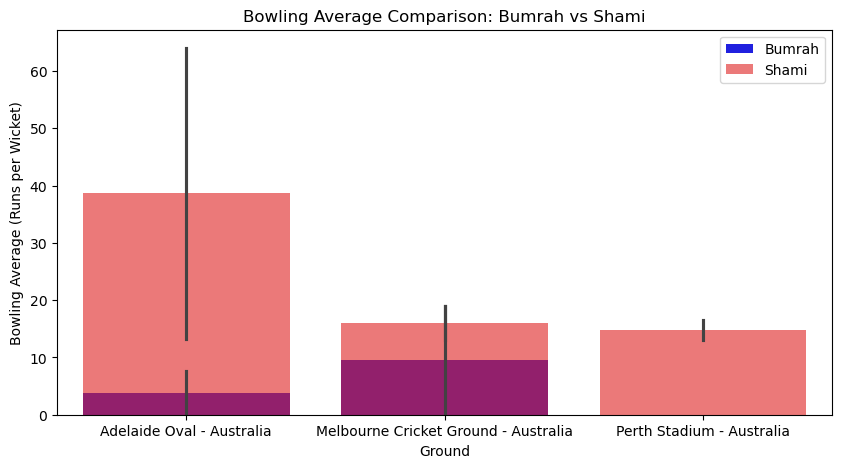

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(x=bumrah_df["Ground"], y=bumrah_df["Ave"], color='blue', label="Bumrah")
sns.barplot(x=shami_df["Ground"], y=shami_df["Ave"], color='red', label="Shami", alpha=0.6)
plt.xlabel("Ground")
plt.ylabel("Bowling Average (Runs per Wicket)")
plt.title("Bowling Average Comparison: Bumrah vs Shami")
plt.legend()
plt.show()

**Interpretation:** Lower Bowling Average is better. A lower BA suggests the bowler is more economical while taking wickets. From the above visual it is evident that J Bumrah has a lower BA than M Shami.

#### Data Visualization: Economy Rate Comparison

compares the Economy Rate of both bowlers at different grounds.

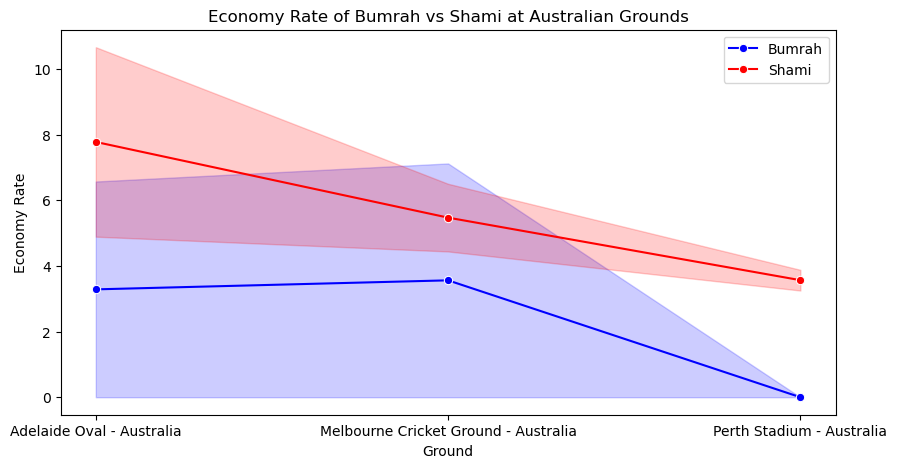

In [93]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=bumrah_df["Ground"], y=bumrah_df["Econ"], marker="o", label="Bumrah", color='blue')
sns.lineplot(x=shami_df["Ground"], y=shami_df["Econ"], marker="o", label="Shami", color='red')
plt.xlabel("Ground")
plt.ylabel("Economy Rate")
plt.title("Economy Rate of Bumrah vs Shami at Australian Grounds")
plt.legend()
plt.show()

**Interpretation:** Shami has the highest economy rate overall.

Based on this, Bumrah is the better choice because:
- Lower Strike Rate
- Better Economy
- Lower Bowling Average

#### Comparison of bowler performance per ground

C:\Users\suhan\AppData\Local\Temp\ipykernel_21020\2097935842.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ground_names, rotation=45, ha='right')
C:\Users\suhan\AppData\Local\Temp\ipykernel_21020\2097935842.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ground_names, rotation=45, ha='right')
C:\Users\suhan\AppData\Local\Temp\ipykernel_21020\2097935842.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ground_names, rotation=45, ha='right')
C:\Users\suhan\AppData\Local\Temp\ipykernel_21020\2097935842.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ground_names, r

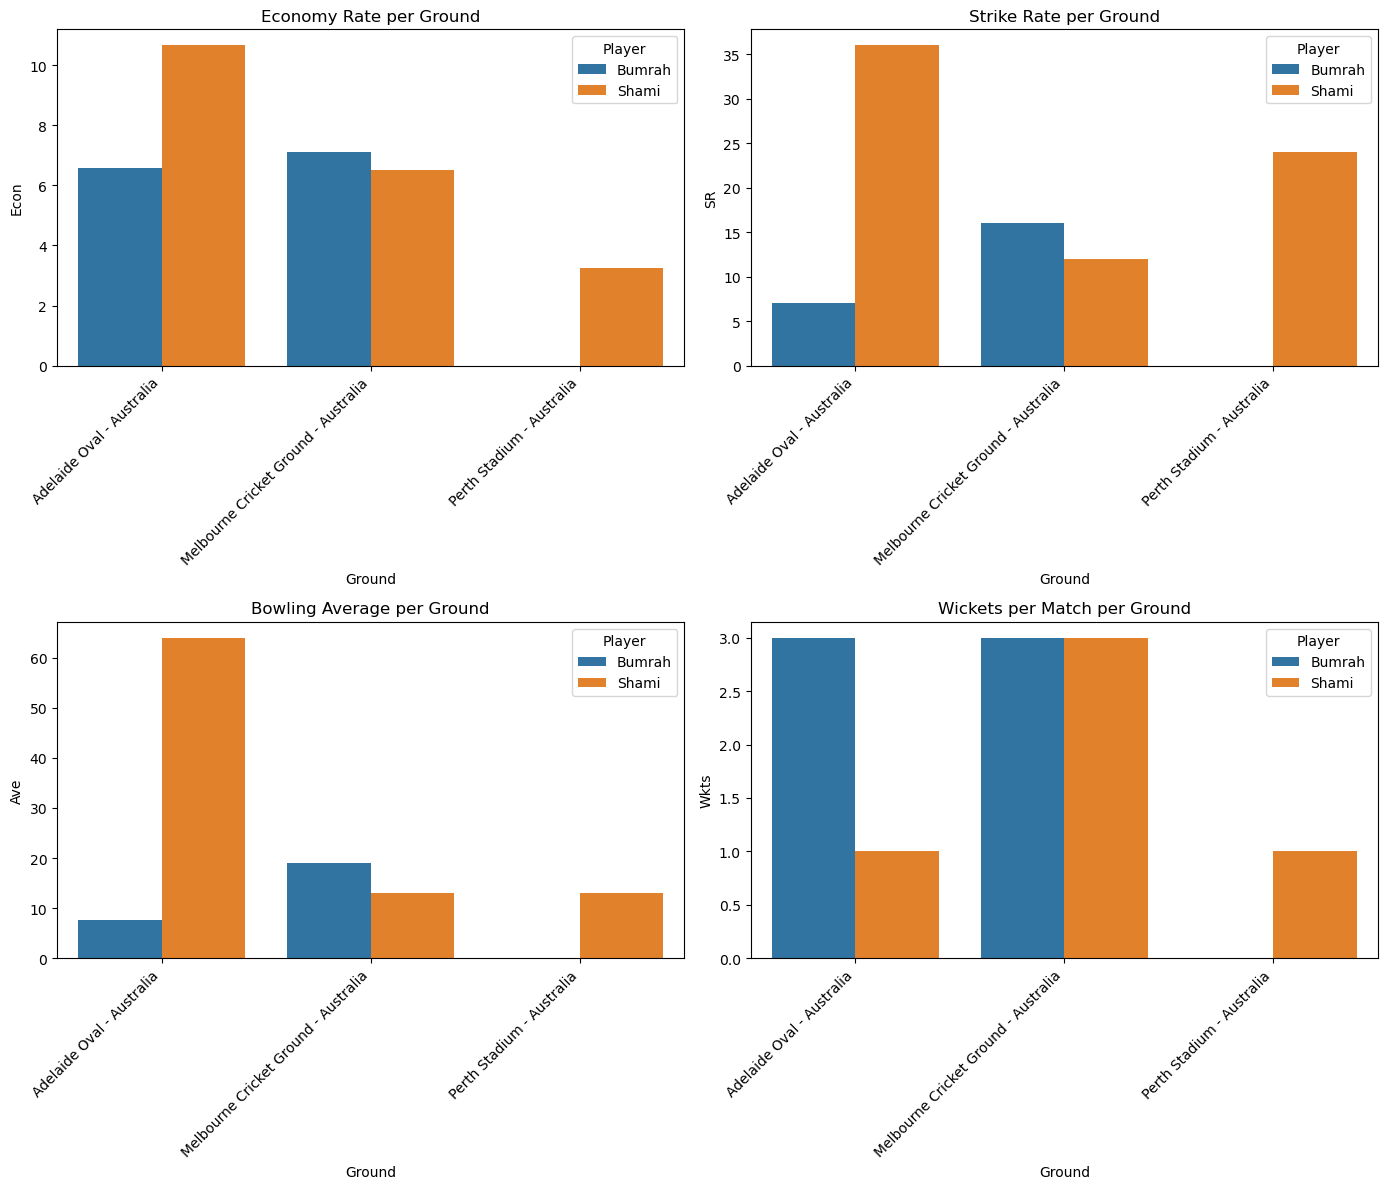

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

ground_stats = df.groupby(['Ground', 'Player']).agg({
    'Econ': 'mean',
    'SR': 'mean',
    'Ave': 'mean',
    'Wkts': 'mean'
}).reset_index()

ground_stats['Player'] = ground_stats['Player'].map({0: 'Bumrah', 1: 'Shami'})

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Economy rate
sns.barplot(x='Ground', y='Econ', hue='Player', data=ground_stats, ax=axes[0, 0])
axes[0, 0].set_title('Economy Rate per Ground')

# Strike Rate
sns.barplot(x='Ground', y='SR', hue='Player', data=ground_stats, ax=axes[0, 1])
axes[0, 1].set_title('Strike Rate per Ground')

# Bowling Average
sns.barplot(x='Ground', y='Ave', hue='Player', data=ground_stats, ax=axes[1, 0])
axes[1, 0].set_title('Bowling Average per Ground')

# Wickets per Match
sns.barplot(x='Ground', y='Wkts', hue='Player', data=ground_stats, ax=axes[1, 1])
axes[1, 1].set_title('Wickets per Match per Ground')

ground_names = ground_encoder.inverse_transform(df['Ground'].unique())

for ax in axes.flat:
    ax.set_xticklabels(ground_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Overall Summary

1. **Strike Rate**:
Bumrah also has lower bars for Strike Rate, meaning he takes wickets faster than Shami.

2. **Bowling Average**:
Bumrah shows lower bars, indicating he concedes fewer runs per wicket taken compared to Shami.

3. **Economy Rate**:
Bumrah has lower bars than Shami, which indicates that Bumrah is more economical overall.

4. **Wickets per Match**:
Bumrah’s bars are lower here, meaning he takes fewer wickets on average per match. However, this metric might not be as critical for analyzing effectiveness.

Bumrah consistently out performs Shami when it comes to key stats like economy rate, strike rate, and bowling average. This makes him the more effective bowler overall, particularly in Australian grounds.